In [ ]:
!pip install squarify

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import numpy as np


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5357,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto
5358,VEN,Moderna,5,2021-11-11,ITH,ITH3,5,Veneto
5359,VEN,Moderna,161300,2021-11-22,ITH,ITH3,5,Veneto
5360,VEN,Moderna,2,2021-11-24,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file

In [ ]:
df.index.max()            

5360

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ').title(), 'numero_dosi'].count()

Inserisci in nome di una regione: Lombardia


265

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
user_input = input('Inserisci nome di una regione: ').title()
n = df['nome_area'].str.contains(user_input).sum()

if n > 0:
  print("la regione ",user_input,df.loc[df['nome_area'] == user_input, 'numero_dosi'].count())
else:
  print('La regione inserita non esiste')

4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
print(df.loc[df['nome_area'] == input('Inserisci in nome di una regione: ').title(), 'numero_dosi'].sum())

Inserisci in nome di una regione: Lombardia
17607589


5. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'})

,fornitore,numero_dosi
0,Janssen,1846114
1,Moderna,16881558
2,Pfizer/BioNTech,71421340
3,Vaxzevria (AstraZeneca),11544594


6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
data = df[df['nome_area'] == input('Inserisci in nome di una regione: ').title()]
data = data.groupby('fornitore', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
data

Inserisci in nome di una regione: f


,fornitore,numero_dosi


7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

NameError: ignored

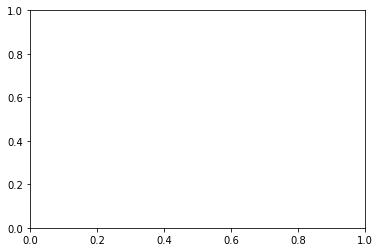

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.bar(data['fornitore'], data['numero_dosi'].values)
fig.autofmt_xdate(rotation=45)

data['numero_dosi'].values

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta

array([], dtype=int64)

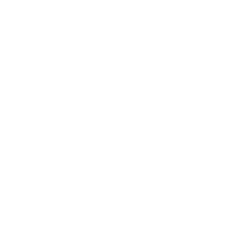

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.pie(data['numero_dosi'].values, labels=data['fornitore'])

data['numero_dosi'].values

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap

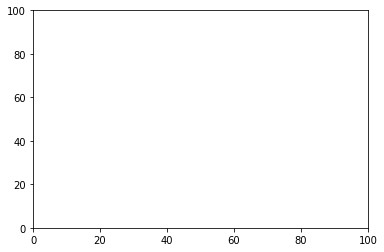

In [ ]:
squarify.plot(sizes=data['numero_dosi'], label=data['fornitore'])
plt.show()

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
data = df.groupby('nome_area', as_index=False).agg({'numero_dosi': 'sum'}).sort_values('numero_dosi', ascending=False)
data.head(3)

,nome_area,numero_dosi
8,Lombardia,17607589
6,Lazio,10533415
3,Campania,9179718


11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [ ]:
data[data['numero_dosi'] < data['numero_dosi'].mean()]

,nome_area,numero_dosi
2,Calabria,2961954
15,Sardegna,2805971
9,Marche,2556656
7,Liguria,2547002
0,Abruzzo,2309752
5,Friuli-Venezia Giulia,2071003
18,Umbria,1497297
1,Basilicata,954565
13,Provincia Autonoma Trento,878910
12,Provincia Autonoma Bolzano / Bozen,817279


12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

In [ ]:
from dateutil.relativedelta import relativedelta
import datetime
from datetime import date, timedelta

yesterday = date.today() - timedelta(180)
yesterday


datetime.date(2021, 5, 29)

In [ ]:
 dfll = df[(df["nome_area"] == "Lombardia") | (df["nome_area"] == "Lazio") ]  ##visualizzare i nomi solo della Lombardia e del lazio
 yesterday = date.today() - timedelta(180) 
yesterday
 dati = dfll[dfll["data_consegna"] > str(yesterday)].groupby('nome_area').count() ## visualizzare gli ultimi 6 mesi 
dati



,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT
nome_area,,,,,,,
Lazio,442,442,442,442,442,442,442
Lombardia,160,160,160,160,160,160,160
